In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor

# Data preparation
data = {
    'NEET Marks': [710, 675, 625, 575, 525, 475, 425, 375],
    'Expected Rank': [50.5, 550, 3000, 7500, 15000, 25000, 40000, 55000]
}

df = pd.DataFrame(data)

import pandas as pd

college_data = {
    'College Name': [
        'AIIMS Delhi', 'AIIMS Bhopal', 'AIIMS Bhubaneswar', 'AIIMS Jodhpur', 'AIIMS Patna',
        'Maulana Azad Medical College', 'Lady Hardinge Medical College', 'Grant Medical College',
        'King George’s Medical University', 'Kalinga Institute of Medical Sciences',
        'St. John’s Medical College', 'Christian Medical College Vellore', 'Kasturba Medical College',
        'Manipal College of Medical Sciences', 'Sri Ramachandra Medical College', 'Sree Chitra Tirunal Institute for Medical Sciences',
        'Jawaharlal Institute of Postgraduate Medical Education and Research', 'Postgraduate Institute of Medical Education and Research',
        'All India Institute of Medical Sciences, Rishikesh', 'All India Institute of Medical Sciences, Raipur'
    ],
    'Opening Rank': [
        1, 100, 500, 1000, 2000, 1, 50, 100, 200, 500, 1000, 1500, 2000, 2500, 3000, 3500, 4000, 4500, 5000, 5500
    ],
    'Closing Rank': [
        50, 200, 1000, 2000, 5000, 100, 500, 1000, 2000, 5000, 10000, 15000, 20000, 25000, 30000, 35000, 40000, 45000, 50000, 55000
    ]
}

college_df = pd.DataFrame(college_data)



In [2]:
# Features and target variable
X = df[['NEET Marks']]
y = df['Expected Rank']

# Initialize the Random Forest Regressor
model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
model.fit(X, y)


RandomForestRegressor(random_state=42)

C:\Users\Vedant\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


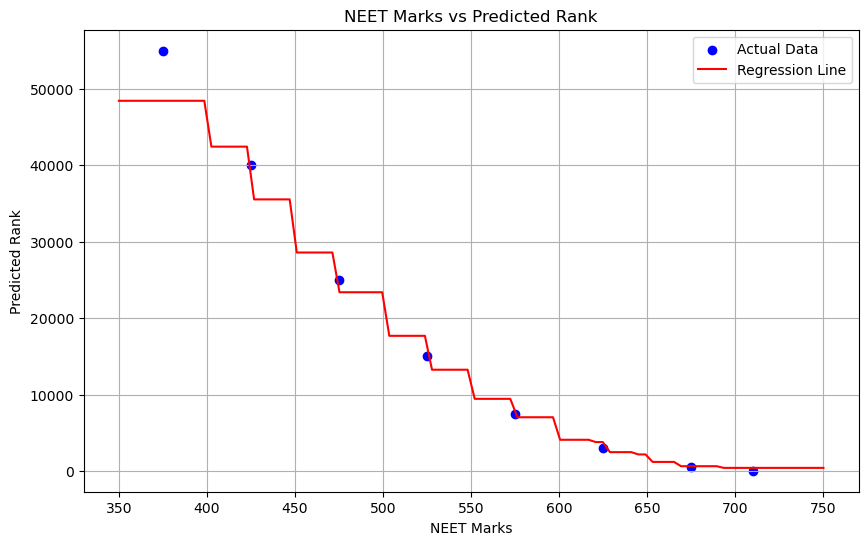

In [3]:
# Generate a range of marks for plotting the regression line
marks_range = np.linspace(350, 750, 100).reshape(-1, 1)

# Predict ranks for the generated marks
predicted_ranks = model.predict(marks_range)

# Plotting
plt.figure(figsize=(10, 6))
plt.scatter(df['NEET Marks'], df['Expected Rank'], color='blue', label='Actual Data')
plt.plot(marks_range, predicted_ranks, color='red', label='Regression Line')
plt.title('NEET Marks vs Predicted Rank')
plt.xlabel('NEET Marks')
plt.ylabel('Predicted Rank')
plt.legend()
plt.grid(True)
plt.show()


In [4]:
def predict_college(student_marks):
    # Predict the NEET rank
    predicted_rank = model.predict(np.array([[student_marks]]))[0]
    
    # Convert the predicted rank to an integer
    predicted_rank = int(predicted_rank)
    
    # Find colleges where the predicted rank falls within the opening and closing ranks
    eligible_colleges = college_df[
        (college_df['Opening Rank'] <= predicted_rank) & (college_df['Closing Rank'] >= predicted_rank)
    ]
    
    if not eligible_colleges.empty:
        return predicted_rank, eligible_colleges['College Name'].tolist()
    else:
        return predicted_rank, ["No suitable college found"]

# Example: Predict for a student scoring 700 marks
student_marks = 700
predicted_rank, colleges = predict_college(student_marks)

print(f"Predicted NEET Rank for {student_marks} marks: {predicted_rank}")
print(f"Eligible Colleges: {', '.join(colleges)}")


Predicted NEET Rank for 700 marks: 421
Eligible Colleges: Lady Hardinge Medical College, Grant Medical College, King George’s Medical University


C:\Users\Vedant\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
